# Numpy

Tests for Einsum and Einops are included below (see outline)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# check numpy version
print(np.__version__)

2.0.2


In [3]:
def chessboard(shape):
  return np.indices(shape).sum(axis=0) % 2

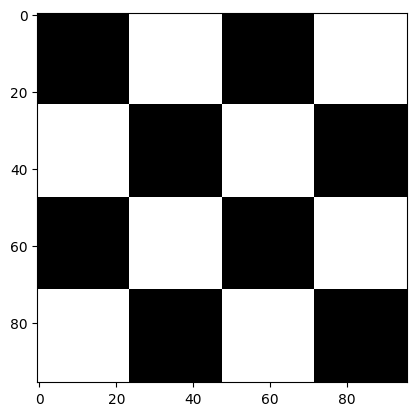

In [4]:
img = chessboard((4,4))*255
img = np.repeat(img, (24), axis=0)
img = np.repeat(img, (24), axis=1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

In [5]:
from matplotlib import image
dog = image.imread('assets/aki_dog.jpg')

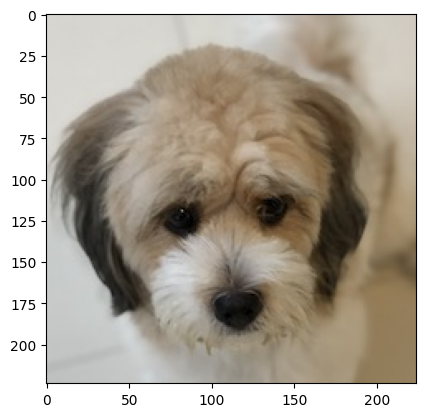

In [6]:
plt.imshow(dog);

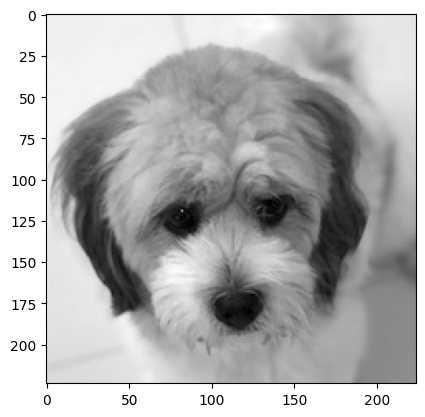

In [7]:
plt.imshow(np.mean(dog,axis=-1), cmap='gray');


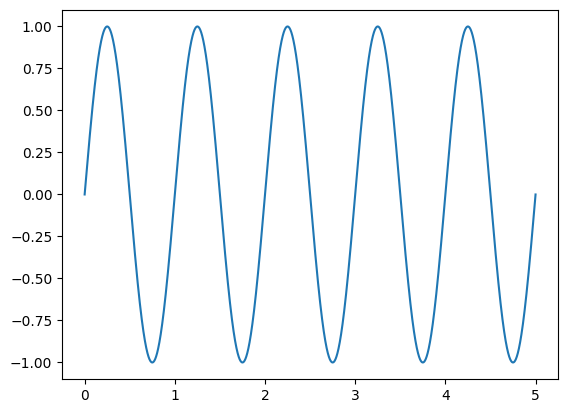

In [8]:
samples_per_sec = 22050
freq = 1
n_points = samples_per_sec*5
t = np.linspace(0,5,n_points)
data = np.sin(2*np.pi*freq*t)
plt.plot(t,data);

# Einsum

In [9]:
from numpy import einsum

In [14]:
w = np.arange(6).reshape(2,3).astype(np.float32) 
x = np.ones((3,1), dtype=np.float32)

print(w)
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]
[[1.]
 [1.]
 [1.]]


In [13]:
y = np.matmul(w,x)
y_at = w @ x
y_ein = einsum('ij,jk->ik',w,x)

print(y)
print(y_at)
print(y_ein)

[[ 3.]
 [12.]]
[[ 3.]
 [12.]]
[[ 3.]
 [12.]]


In [15]:
w = np.arange(6).reshape(2,3).astype(np.float32) 
x = np.ones((1,3), dtype=np.float32)

print(w)
print(x)

[[0. 1. 2.]
 [3. 4. 5.]]
[[1. 1. 1.]]


In [16]:
y = np.matmul(w,np.transpose(x))
y_at = w @ x.T
y_ein = einsum('ij,kj->ik', w, x)

print(y)
print(y_at)
print(y_ein)

[[ 3.]
 [12.]]
[[ 3.]
 [12.]]
[[ 3.]
 [12.]]


In [17]:
w = np.arange(9).reshape(3,3).astype(np.float32)
print(w)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [18]:
print(np.diag(w))
print(einsum('ii->i',w))

[0. 4. 8.]
[0. 4. 8.]


In [19]:
print(np.trace(w))
print(einsum('ii->',w))

12.0
12.0


In [20]:
print(np.sum(w, axis=0))
print(einsum('ij->j',w))

[ 9. 12. 15.]
[ 9. 12. 15.]


In [21]:
print(np.transpose(w))
print(einsum('ij->ji',w))

[[0. 3. 6.]
 [1. 4. 7.]
 [2. 5. 8.]]
[[0. 3. 6.]
 [1. 4. 7.]
 [2. 5. 8.]]


In [22]:
a = np.ones((3,), dtype=np.float32)
b = np.ones((3,), dtype=np.float32) * 2

In [23]:
d = np.dot(a,b)
i = np.inner(a,b)
o = np.outer(a,b)

print(d)
print(i)
print(o)

6.0
6.0
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


In [24]:
d = einsum("i,i->", a, b)
i = einsum("i,i->", a, b)
o = einsum("i,j->ij", a, b)

print(d)
print(i)
print(o)

6.0
6.0
[[2. 2. 2.]
 [2. 2. 2.]
 [2. 2. 2.]]


# Einops

In [38]:
from einops import rearrange, reduce, repeat
from matplotlib import image
from matplotlib import pyplot as plt

In [19]:
img = image.imread('assets/aki_dog.jpg')
print(img.shape)

(224, 224, 3)


In [20]:
img_flattened = rearrange(img, 'h w c -> (h w c)')
print(img_flattened.shape)

(150528,)


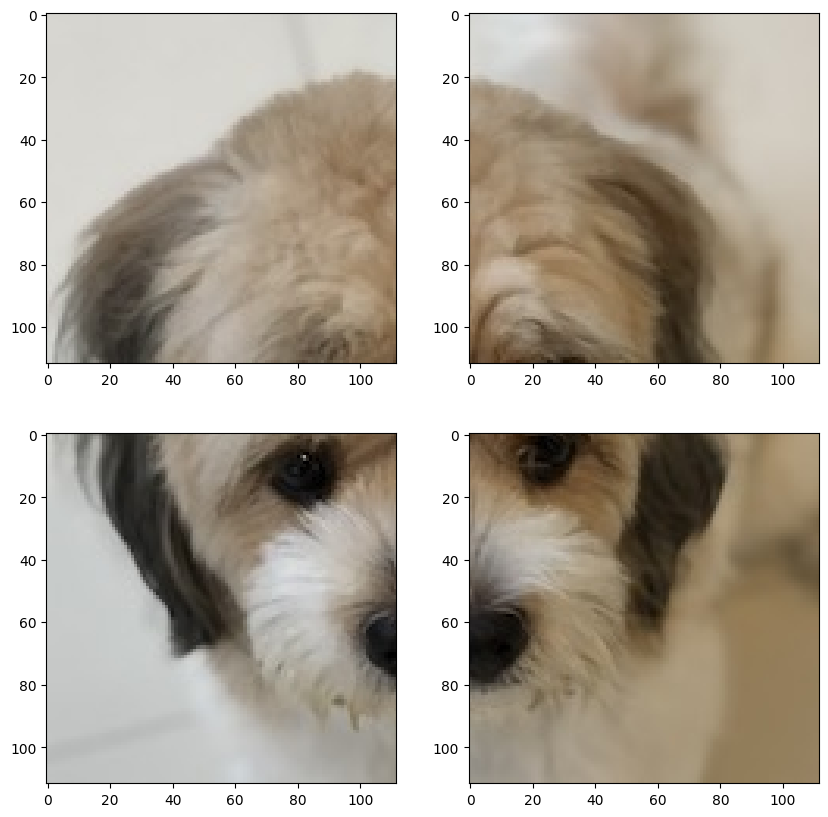

In [22]:
# image to patches
img_patches = rearrange(img, "(p1 h) (p2 w) c -> (p1 p2) h w c", p1=2, p2=2)

# plot 4 patches
plt.figure(figsize=(10,10))
for i in range(4):
  plt.subplot(2,2,i+1)
  plt.imshow(img_patches[i]);


In [30]:
img1 = image.imread("assets/aki_dog.jpg") 
img2 = image.imread("assets/wonder_cat.jpg") 
imgs = np.array([img1, img2])
print(imgs.shape) # shape: b h w c

(2, 224, 224, 3)


In [31]:
imgs = rearrange(imgs, "b (k h) w c -> k b h w c", k =2) # k = 0 upper half, k = 1 lower half, k = 2 both
print(imgs.shape) # shape: k b h w c

(2, 2, 112, 224, 3)


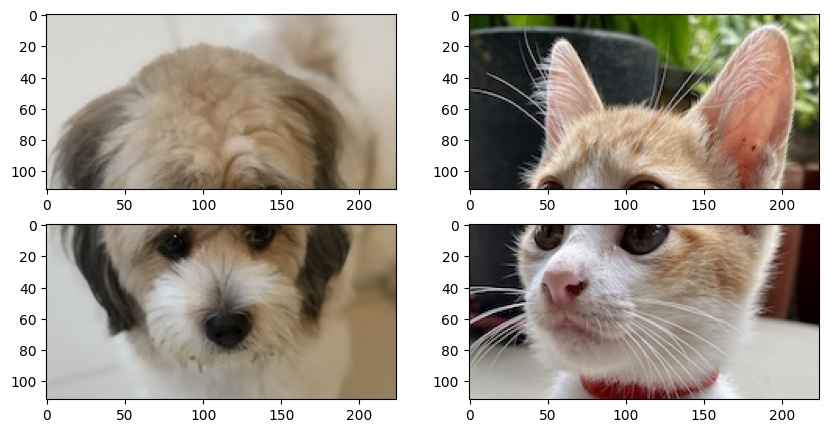

In [34]:
# plot imgs
plt.figure(figsize=(10,5))
for i in range(2):
  for j in range(2):
    plt.subplot(2,2,i*2+j+1)
    plt.imshow(imgs[i,j]);

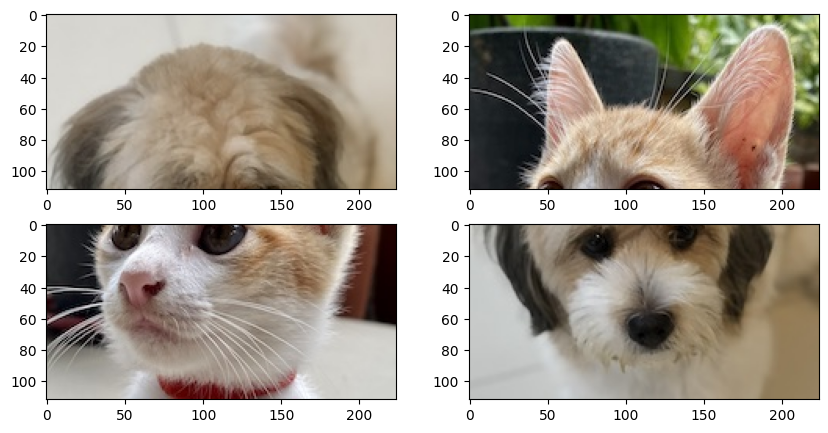

In [35]:
# reverse lower halves using numpy
imgs = np.concatenate([imgs[::2], imgs[1::2,::-1]], axis=0)
print(imgs.shape)

plt.figure(figsize=(10,5))
for i in range(2):
  for j in range(2):
    plt.subplot(2,2,i*2+j+1)
    plt.imshow(imgs[i,j]);

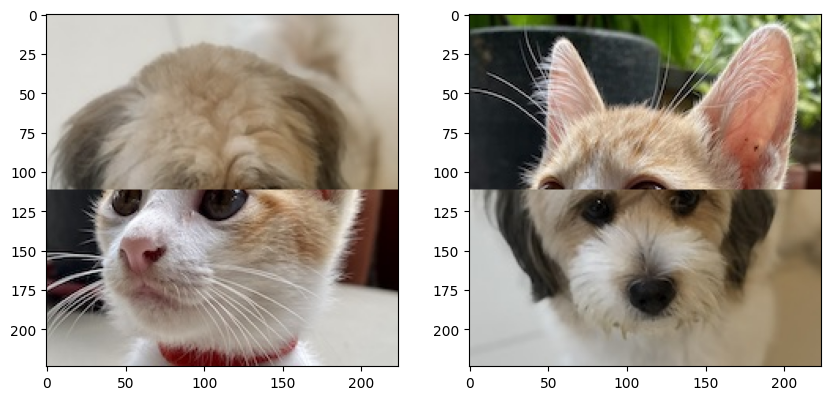

In [36]:
# combine 2 img patches
imgs = rearrange(imgs, "i j h w c -> j (i h) w c")

plt.figure(figsize=(10,5))
for i in range(2):
  plt.subplot(1,2,i+1)
  plt.imshow(imgs[i]);

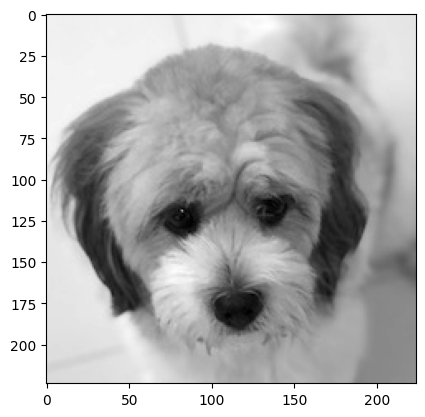

In [46]:
# convert img1 to float tensors
img1 = image.imread("assets/aki_dog.jpg").astype(np.float32)

#rgb to grayscale
img1 = reduce(img1, "h w c -> h w", "mean")
plt.imshow(img1, cmap='gray');

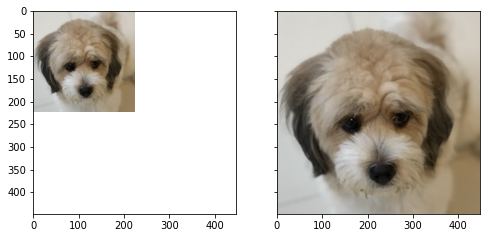

In [69]:
# convert img1 to float tensors
img1 = image.imread("assets/aki_dog.jpg")

# upsize img1
img1_upsized = repeat(img1, 'h w c -> (h 2) (w 2) c');

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(img1);
ax[1].imshow(img1_upsized);

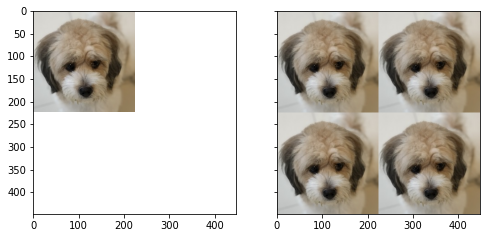

In [71]:
# convert img1 to float tensors
img1 = image.imread("assets/aki_dog.jpg")

# upsize img1
img1_upsized = repeat(img1, 'h w c -> (2 h) (2 w) c');

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(img1);
ax[1].imshow(img1_upsized);

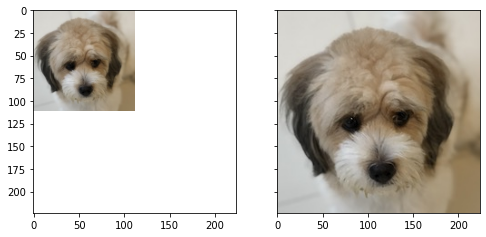

In [68]:
# downsize 
img1 = img1.astype(np.float32)
img1_downsized = reduce(img1, "(h 2) (w 2) c -> h w c", 'mean').astype(np.uint8)
img1 = img1.astype(np.uint8)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 8), dpi=72, sharex=True, sharey=True)
ax[0].imshow(img1_downsized);
ax[1].imshow(img1);

In [ ]:
img.sha